# Código Enade

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

enade = []

#ENADE 2017
enade2017 = pandas.read_csv("datasets\MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str})


enade2017.shape
enade2017.columns[0:14]
enade.append(enade2017)

In [2]:
#ENADE 2016
enade2016 = pandas.read_csv("datasets\MICRODADOS_ENADE_2016.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str})


enade2016.shape
enade2016.columns[0:14]
enade.append(enade2016)

In [3]:
#ENADE 2015
enade2015 = pandas.read_csv("datasets\MICRODADOS_ENADE_2015.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str}, low_memory=False)


enade2015.shape
enade2015.columns[0:14]
enade.append(enade2015)

In [4]:
#ENADE 2014
enade2014 = pandas.read_csv("datasets\MICRODADOS_ENADE_2014.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str}, low_memory=False)



enade2014.shape
enade2014.columns[0:14]
enade.append(enade2014)

In [5]:
#ENADE 2013
enade2013 = pandas.read_csv("datasets\MICRODADOS_ENADE_2013.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str}, low_memory=False)


enade2013.shape
enade2013.columns[0:14]
enade.append(enade2013)

In [162]:
tabela = []

# TODAS
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/cor
tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'NU_IDADE', 'TP_SEXO', 'QE_I08'])

#s/RENDA
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I02'])

#s/SEXO
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'QE_I08', 'QE_I02'])

#s/IDADE
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/Q17
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/regiao
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

##Ignora valores nulos
tabela17 = tabela17.loc[(tabela17['CO_REGIAO_CURSO'].notnull())]
tabela17 = tabela17.loc[(tabela17['CO_CATEGAD'].notnull())]
tabela17 = tabela17.loc[(tabela17['QE_I17'].notnull())]
tabela17 = tabela17.loc[(tabela17['NU_IDADE'].notnull())]
# tabela17 = tabela17.loc[(tabela17['QE_I02'].notnull())]
tabela17 = tabela17.loc[(tabela17['TP_SEXO'].notnull())]
tabela17 = tabela17.loc[(tabela17['QE_I08'].notnull())]


'''
1 - A = Todo em escola pública, D = A maior parte em escola pública.
2 - B = Todo em escola privada (particular), E = A maior parte em escola privada (particular).
3 - C = Todo no exterior, F = Parte no Brasil e parte no exterior
'''

##Mapeamento questão 17
tabela17['QE_I17'] = tabela17['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})

#Mapeamento tipo sexo
tabela17['TP_SEXO'] = tabela17['TP_SEXO'].map({'M': 0, 'F': 1})
#tabela.head(10)

##Mapeamento CO_CATEGAD
tabela17['CO_CATEGAD'] = tabela17['CO_CATEGAD'].map({'1': 0, '2': 0, '3': 0, '4' : 1, '5' : 1, '7' : 2})

# ##Mapeamento RENDA
tabela17['QE_I08'] = tabela17['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7})

# ##Mapeamento COR
# tabela17['QE_I02'] = tabela17['QE_I02'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6})

tabela.append(tabela17)

In [163]:
#TODAS
# tabela16 = pandas.DataFrame(enade[1], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/cor
tabela16 = pandas.DataFrame(enade[1], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'NU_IDADE', 'TP_SEXO', 'QE_I08'])

#s/RENDA
# tabela16 = pandas.DataFrame(enade[1], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I02'])

#s/SEXO
# tabela16 = pandas.DataFrame(enade[1], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'QE_I08', 'QE_I02'])

#s/IDADE
# tabela16 = pandas.DataFrame(enade[1], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/Q17
# tabela16 = pandas.DataFrame(enade[1], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/regiao
# tabela16 = pandas.DataFrame(enade[1], columns = ['CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

##Ignora valores nulos
tabela16 = tabela16.loc[(tabela16['CO_REGIAO_CURSO'].notnull())]
tabela16 = tabela16.loc[(tabela16['CO_CATEGAD'].notnull())]
tabela16 = tabela16.loc[(tabela16['QE_I17'].notnull())]
tabela16 = tabela16.loc[(tabela16['NU_IDADE'].notnull())]
# tabela16 = tabela16.loc[(tabela16['QE_I02'].notnull())]
tabela16 = tabela16.loc[(tabela16['TP_SEXO'].notnull())]
tabela16 = tabela16.loc[(tabela16['QE_I08'].notnull())]

'''
1 - A = Todo em escola pública, D = A maior parte em escola pública.
2 - B = Todo em escola privada (particular), E = A maior parte em escola privada (particular).
3 - C = Todo no exterior, F = Parte no Brasil e parte no exterior
'''

''' Código da categoria administrativa da IES
93 = Pessoa Jurídica de Direito Público - Federal 
115 = Pessoa Jurídica de Direito Público - Estadual
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10004 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Associação de Utilidade Pública
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
'''

##Mapeamento CO_CATEGAD
# 0 = publica, 1 = privada
tabela16['CO_CATEGAD'] = tabela16['CO_CATEGAD'].map({'93': 0, '115': 0, '116': 0, '118' : 1, '121' : 1, '10002': 0,
                                                     '10001' : 0, '10003' : 0, '10004' : 1, '10005' : 1, '10006' : 1, 
                                                    '10007' : 1, '10008' : 1, '10009' : 1})

#Mapeamento tipo sexo
tabela16['TP_SEXO'] = tabela16['TP_SEXO'].map({'M': 0, 'F': 1, 'N' : 3})
#tabela.head(10)

# ##Mapeamento RENDA
tabela16['QE_I08'] = tabela16['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7})

# ##Mapeamento COR
# tabela16['QE_I02'] = tabela16['QE_I02'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6})

##Mapeamento questão 17
tabela16['QE_I17'] = tabela16['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})

#tabela.head(10)

tabela.append(tabela16)
#tabela[1].head(10)

In [164]:
#TODAS
# tabela15 = pandas.DataFrame(enade[2], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/cor
tabela15 = pandas.DataFrame(enade[2], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'NU_IDADE', 'TP_SEXO', 'QE_I08'])

#s/RENDA
# tabela15 = pandas.DataFrame(enade[2], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I02'])

#s/SEXO
# tabela15 = pandas.DataFrame(enade[2], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'QE_I08', 'QE_I02'])

#s/IDADE
# tabela15 = pandas.DataFrame(enade[2], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/Q17
# tabela15 = pandas.DataFrame(enade[2], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/regiao
# tabela15 = pandas.DataFrame(enade[2], columns = ['CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

##Ignora valores nulos
tabela15 = tabela15.loc[(tabela15['CO_REGIAO_CURSO'].notnull())]
tabela15 = tabela15.loc[(tabela15['CO_CATEGAD'].notnull())]
tabela15 = tabela15.loc[(tabela15['QE_I17'].notnull())]
tabela15 = tabela15.loc[(tabela15['NU_IDADE'].notnull())]
tabela15 = tabela15.loc[(tabela15['TP_SEXO'].notnull())]
tabela15 = tabela15.loc[(tabela15['QE_I08'].notnull())]
# tabela15 = tabela15.loc[(tabela15['QE_I02'].notnull())]

'''
93 = Pessoa Jurídica de Direito Público - Federal 
115 = Pessoa Jurídica de Direito Público - Estadual
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
'''

##Mapeamento CO_CATEGAD
# 0 = publica, 1 = privada
tabela15['CO_CATEGAD'] = tabela15['CO_CATEGAD'].map({'93': 0, '115': 0, '116': 0, '118' : 1, '121' : 1, '10002': 0,
                                                     '10001' : 0, '10003' : 0, '10005' : 1, '10006' : 1, 
                                                    '10007' : 1, '10008' : 1, '10009' : 1})

#Mapeamento tipo sexo
tabela15['TP_SEXO'] = tabela15['TP_SEXO'].map({'M': 0, 'F': 1, 'N' : 3})
#tabela.head(10)

# ##Mapeamento RENDA
tabela15['QE_I08'] = tabela15['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7})

'''
Como você se considera?	
A = Branco(a).
B = Negro(a).
C = Pardo(a)/mulato(a).
D = Amarelo(a) (de origem oriental).
E = Indígena ou de origem indígena.
'''

# ##Mapeamento COR
# tabela15['QE_I02'] = tabela15['QE_I02'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5})

##Mapeamento questão 17
tabela15['QE_I17'] = tabela15['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})

tabela.append(tabela15)

In [165]:
#TODAS
# tabela14 = pandas.DataFrame(enade[3], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/cor
tabela14 = pandas.DataFrame(enade[3], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'NU_IDADE', 'TP_SEXO', 'QE_I08'])

#s/RENDA
# tabela14 = pandas.DataFrame(enade[3], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I02'])

#s/SEXO
# tabela14 = pandas.DataFrame(enade[3], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'QE_I08', 'QE_I02'])

#s/IDADE
# tabela14 = pandas.DataFrame(enade[3], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/Q17
# tabela14 = pandas.DataFrame(enade[3], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/regiao
# tabela14 = pandas.DataFrame(enade[3], columns = ['CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

##Ignora valores nulos
tabela14 = tabela14.loc[(tabela14['CO_REGIAO_CURSO'].notnull())]
tabela14 = tabela14.loc[(tabela14['CO_CATEGAD'].notnull())]
tabela14 = tabela14.loc[(tabela14['QE_I17'].notnull())]
tabela14 = tabela14.loc[(tabela14['NU_IDADE'].notnull())]
tabela14 = tabela14.loc[(tabela14['TP_SEXO'].notnull())]
tabela14 = tabela14.loc[(tabela14['QE_I08'].notnull())]
# tabela14 = tabela14.loc[(tabela14['QE_I02'].notnull())]

'''
93 = Pessoa Jurídica de Direito Público - Federal
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10004 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Associação de Utilidade Pública
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
'''

##Mapeamento CO_CATEGAD
tabela14['CO_CATEGAD'] = tabela14['CO_CATEGAD'].map({'93': 0, '116': 0, '118' : 1, '121' : 1, '10002': 0,
                                                     '10001' : 0, '10003' : 0, '10005' : 1, '10004' : 1, '10006' : 1, 
                                                    '10007' : 1, '10008' : 1, '10009' : 1})


#Mapeamento tipo sexo
tabela14['TP_SEXO'] = tabela14['TP_SEXO'].map({'M': 0, 'F': 1, 'N' : 3})
#tabela.head(10)

# ##Mapeamento RENDA
tabela14['QE_I08'] = tabela14['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7})

'''
Como você se considera?	
A = Branco(a).
B = Negro(a).
C = Pardo(a)/mulato(a).
D = Amarelo(a) (de origem oriental).
E = Indígena ou de origem indígena.
'''

# ##Mapeamento COR
# tabela14['QE_I02'] = tabela14['QE_I02'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5})

##Mapeamento questão 17
tabela14['QE_I17'] = tabela14['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})

tabela.append(tabela14)
#tabela[3].head(10)


In [166]:
#TODAS
# tabela13 = pandas.DataFrame(enade[4], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I16','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/cor
tabela13 = pandas.DataFrame(enade[4], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I16', 'NU_IDADE', 'TP_SEXO', 'QE_I08'])

#s/RENDA
# tabela13 = pandas.DataFrame(enade[4], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I02'])

#s/SEXO
# tabela13 = pandas.DataFrame(enade[4], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'QE_I08', 'QE_I02'])

#s/IDADE
# tabela13 = pandas.DataFrame(enade[4], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/Q17
# tabela13 = pandas.DataFrame(enade[4], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

#s/regiao
# tabela13 = pandas.DataFrame(enade[4], columns = ['CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])

##Ignora valores nulos
tabela13 = tabela13.loc[(tabela13['CO_REGIAO_CURSO'].notnull())]
tabela13 = tabela13.loc[(tabela13['CO_CATEGAD'].notnull())]
tabela13 = tabela13.loc[(tabela13['QE_I16'].notnull())]
tabela13 = tabela13.loc[(tabela13['NU_IDADE'].notnull())]
tabela13 = tabela13.loc[(tabela13['TP_SEXO'].notnull())]
tabela13 = tabela13.loc[(tabela13['QE_I08'].notnull())]
# tabela13 = tabela13.loc[(tabela13['QE_I02'].notnull())]

##Mapeamento questão 16
tabela13['QE_I16'] = tabela13['QE_I16'].map({'A': 1, 'B': 2, 'C': 1, 'D': 2})
#tabela.head(10)

'''
93 = Pessoa Jurídica de Direito Público - Federal
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
'''

##Mapeamento CO_CATEGAD
tabela13['CO_CATEGAD'] = tabela13['CO_CATEGAD'].map({'93': 0, '116': 0, '118' : 1, '121' : 1, '10002': 0,
                                                     '10001' : 0, '10003' : 0, '10005' : 1, '10006' : 1, 
                                                    '10007' : 1, '10008' : 1, '10009' : 1})

#Mapeamento tipo sexo
tabela13['TP_SEXO'] = tabela13['TP_SEXO'].map({'M': 0, 'F': 1, 'N' : 3})
#tabela.head(10)

# ##Mapeamento RENDA
tabela13['QE_I08'] = tabela13['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6})

'''
Como você se considera?	
A = Branco(a).
B = Negro(a).
C = Pardo(a)/mulato(a).
D = Amarelo(a) (de origem oriental).
E = Indígena ou de origem indígena.
'''

# ##Mapeamento COR
# tabela13['QE_I02'] = tabela13['QE_I02'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5})

tabela.append(tabela13)

In [167]:
escola_publica = []
escola_privada = []
escola_exterior = []

escola_publica17 = tabela[0][tabela[0]['QE_I17'] == 1]
escola_privada17 = tabela[0][tabela[0]['QE_I17'] == 2]
escola_exterior17 = tabela[0][tabela[0]['QE_I17'] == 3]

escola_publica.append(escola_publica17)
escola_privada.append(escola_privada17)
escola_exterior.append(escola_exterior17)

escola_publica[0].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,340621.000000,340621.000000,340621.0,340621.000000,340621.000000,340621.000000
mean,3.072858,0.680184,1.0,29.680727,0.587001,2.407074
std,1.000653,0.476537,0.0,8.263733,0.492373,1.296746
min,1.000000,0.000000,1.0,16.000000,0.000000,1.000000
25%,3.000000,0.000000,1.0,23.000000,0.000000,1.000000
50%,3.000000,1.000000,1.0,27.000000,1.000000,2.000000
75%,4.000000,1.000000,1.0,34.000000,1.000000,3.000000
max,5.000000,2.000000,1.0,87.000000,1.000000,7.000000


In [168]:
escola_privada[0].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,125586.000000,125586.000000,125586.0,125586.000000,125586.000000,125586.000000
mean,3.003806,0.556049,2.0,26.783543,0.452566,3.799818
std,0.914788,0.500141,0.0,6.976209,0.497747,1.647238
min,1.000000,0.000000,2.0,18.000000,0.000000,1.000000
25%,2.000000,0.000000,2.0,23.000000,0.000000,2.000000
50%,3.000000,1.000000,2.0,24.000000,0.000000,4.000000
75%,3.000000,1.000000,2.0,28.000000,1.000000,5.000000
max,5.000000,2.000000,2.0,85.000000,1.000000,7.000000


In [169]:

escola_exterior[0].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,1449.000000,1449.000000,1449.0,1449.000000,1449.000000,1449.000000
mean,3.222222,0.634231,3.0,27.766046,0.440994,4.261560
std,0.792072,0.483243,0.0,7.581495,0.496677,1.925381
min,1.000000,0.000000,3.0,19.000000,0.000000,1.000000
25%,3.000000,0.000000,3.0,23.000000,0.000000,3.000000
50%,3.000000,1.000000,3.0,25.000000,0.000000,5.000000
75%,4.000000,1.000000,3.0,29.000000,1.000000,6.000000
max,5.000000,2.000000,3.0,67.000000,1.000000,7.000000


In [170]:
''' CO_CATEGAD
Código da categoria administrativa da IES
1 = Pública Federal
2 = Pública Estadual
3 = Pública Municipal
4 = Privada com fins lucrativos
5 = Privada sem fins lucrativos
7 = Especial
'''

#Lista alunos que estudaram em escola pública
p_ip = [] #ensino superior público
p_ipp = [] #ensino superior privado

# ESCOLA PUBLICA vs CO_CATEGAD
p_ip17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 0)]
p_ipp17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 1)]

p_ip.append(p_ip17)
p_ipp.append(p_ipp17)

#Lista alunos que estudaram em escola privada
pp_ip = [] #ensino superior público
pp_ipp = [] #ensino superior privado

# ESCOLA PRIVADA vs CO_CATEGAD
pp_ip17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 0)]
pp_ipp17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 1)]

pp_ip.append(pp_ip17)
pp_ipp.append(pp_ipp17)

#Lista alunos que estudaram em escola no exterior
e_ip = [] #ensino superior público
e_ipp = [] #ensino superior privado

# ESCOLA EXTERIOR vs CO_CATEGAD
e_ip17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 0)]
e_ipp17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 1)]

e_ip.append(e_ip17)
e_ipp.append(e_ipp17)

In [171]:
#TOTAL estudantes
total_p = [] #pública
total_pp = [] #privada
total_e = [] #exterior

total_p17 = escola_publica[0].shape[0]
total_pp17 = escola_privada[0].shape[0]
total_e17 = escola_exterior[0].shape[0]

total_p.append(total_p17)
total_pp.append(total_pp17)
total_e.append(total_e17)

#TOTAL estudantes públicos
total_p_ip = [] #que estudaram em instituição pública
total_p_ipp = [] #que estudaram em instituição privada

#TOTAL estudantes privados
total_pp_ip = [] #que estudaram em instituição pública
total_pp_ipp = [] #que estudaram em instituição privada

#TOTAL estudantes exterior
total_e_ip = [] #que estudaram em instituição pública
total_e_ipp = [] #que estudaram em instituição privada

total_p_ip17 = (p_ip[0].shape[0]/total_p[0]) * 100
total_p_ipp17 = (p_ipp[0].shape[0]/total_p[0]) * 100

total_pp_ip17 = (pp_ip[0].shape[0]/total_pp[0]) * 100
total_pp_ipp17 = (pp_ipp[0].shape[0]/total_pp[0]) * 100

total_e_ip17 = (e_ip[0].shape[0]/total_e[0]) * 100
total_e_ipp17 = (e_ipp[0].shape[0]/total_e[0]) * 100

total_p_ip.append(total_p_ip17)
total_p_ipp.append(total_p_ipp17)
total_pp_ip.append(total_pp_ip17)
total_pp_ipp.append(total_pp_ipp17)
total_e_ip.append(total_e_ip17)
total_e_ipp.append(total_e_ipp17)

print('ENADE - 2017 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[0])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[0])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[0])
print('                                                                                 Total = ', total_p_ip[0] +  total_p_ipp[0])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[0])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[0])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[0])
print('                                                                                 Total = ', total_pp_ip[0] +  total_pp_ipp[0])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[0])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[0])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[0])
print('                                                                                     Total = ', total_e_ip[0] +  total_e_ipp[0])

ENADE - 2017 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  340621
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  32.45924355808949
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  67.06309945658077
                                                                                 Total =  99.52234301467027

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  125586
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  44.55910690682082
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  55.276862070612964
                                                                                 Total =  99.8359689774338

..... ENSINO MÉDIO EX

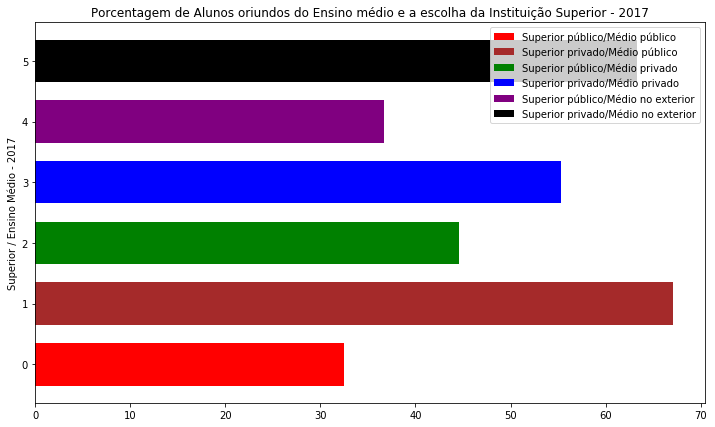

In [172]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[0], total_p_ipp[0], total_pp_ip[0], total_pp_ipp[0], total_e_ip[0], total_e_ipp[0]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2017')
plt.ylabel('Superior / Ensino Médio - 2017')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


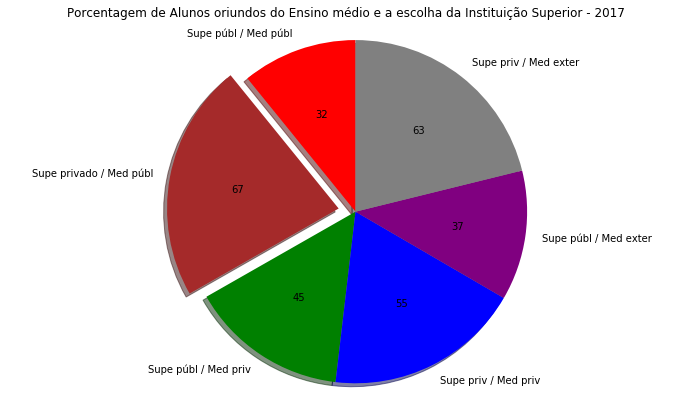

In [173]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[0], total_p_ipp[0], total_pp_ip[0], total_pp_ipp[0], total_e_ip[0], total_e_ipp[0]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2017')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

# salvando a imagem
#plt.savefig('Superior_Ensino_Médio-2017.png')

In [174]:
escola_publica16 = tabela[1][tabela[1]['QE_I17'] == 1]
escola_privada16 = tabela[1][tabela[1]['QE_I17'] == 2]
escola_exterior16 = tabela[1][tabela[1]['QE_I17'] == 3]

escola_publica.append(escola_publica16)
escola_privada.append(escola_privada16)
escola_exterior.append(escola_exterior16)

escola_publica[1].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,138209.000000,138209.000000,138209.0,138209.000000,138209.000000,138209.000000
mean,3.041249,0.813297,1.0,28.908479,0.733946,2.433025
std,1.066944,0.389674,0.0,7.971771,0.442042,1.295089
min,1.000000,0.000000,1.0,17.000000,0.000000,1.000000
25%,2.000000,1.000000,1.0,23.000000,0.000000,1.000000
50%,3.000000,1.000000,1.0,26.000000,1.000000,2.000000
75%,4.000000,1.000000,1.0,33.000000,1.000000,3.000000
max,5.000000,1.000000,1.0,89.000000,3.000000,7.000000


In [175]:
escola_privada[1].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,63846.000000,63846.000000,63846.0,63846.000000,63846.000000,63846.000000
mean,2.888685,0.668687,2.0,26.137002,0.699621,3.825204
std,0.981191,0.470689,0.0,6.154543,0.458631,1.693525
min,1.000000,0.000000,2.0,18.000000,0.000000,1.000000
25%,2.000000,0.000000,2.0,23.000000,0.000000,2.000000
50%,3.000000,1.000000,2.0,24.000000,1.000000,4.000000
75%,3.000000,1.000000,2.0,27.000000,1.000000,5.000000
max,5.000000,1.000000,2.0,77.000000,3.000000,7.000000


In [176]:

escola_exterior[1].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,545.000000,545.000000,545.0,545.000000,545.000000,545.000000
mean,3.159633,0.699083,3.0,26.904587,0.664220,4.392661
std,0.888149,0.459078,0.0,6.059302,0.472696,1.924098
min,1.000000,0.000000,3.0,20.000000,0.000000,1.000000
25%,3.000000,0.000000,3.0,23.000000,0.000000,3.000000
50%,3.000000,1.000000,3.0,25.000000,1.000000,5.000000
75%,4.000000,1.000000,3.0,28.000000,1.000000,6.000000
max,5.000000,1.000000,3.0,64.000000,1.000000,7.000000


In [177]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2016
p_ip16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 0)]
p_ipp16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 1)]

p_ip.append(p_ip16)
p_ipp.append(p_ipp16)

# ESCOLA PRIVADA vs CO_CATEGAD - 2016
pp_ip16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 0)]
pp_ipp16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 1)]

pp_ip.append(pp_ip16)
pp_ipp.append(pp_ipp16)

# ESCOLA EXTERIOR vs CO_CATEGAD - 2016
e_ip16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 0)]
e_ipp16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 1)]

e_ip.append(e_ip16)
e_ipp.append(e_ipp16)

In [178]:
total_p16 = escola_publica[1].shape[0]
total_pp16 = escola_privada[1].shape[0]
total_e16 = escola_exterior[1].shape[0]

total_p.append(total_p16)
total_pp.append(total_pp16)
total_e.append(total_e16)

total_p_ip16 = (p_ip[1].shape[0]/total_p[1]) * 100
total_p_ipp16 = (p_ipp[1].shape[0]/total_p[1]) * 100

total_pp_ip16 = (pp_ip[1].shape[0]/total_pp[1]) * 100
total_pp_ipp16 = (pp_ipp[1].shape[0]/total_pp[1]) * 100

total_e_ip16 = (e_ip[1].shape[0]/total_e[1]) * 100
total_e_ipp16 = (e_ipp[1].shape[0]/total_e[1]) * 100

total_p_ip.append(total_p_ip16)
total_p_ipp.append(total_p_ipp16)
total_pp_ip.append(total_pp_ip16)
total_pp_ipp.append(total_pp_ipp16)
total_e_ip.append(total_e_ip16)
total_e_ipp.append(total_e_ipp16)

print('ENADE - 2016 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[1])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[1])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[1])
print('                                                                                 Total = ', total_p_ip[1] +  total_p_ipp[1])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[1])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[1])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[1])
print('                                                                                 Total = ', total_pp_ip[1] +  total_pp_ipp[1])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[1])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[1])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[1])
print('                                                                                     Total = ', total_e_ip[1] +  total_e_ipp[1])

ENADE - 2016 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  138209
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  18.67027472885268
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  81.32972527114732
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  63846
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  33.13128465369796
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  66.86871534630204
                                                                                 Total =  100.0

..... ENSINO MÉDIO EXTERIOR .....
            

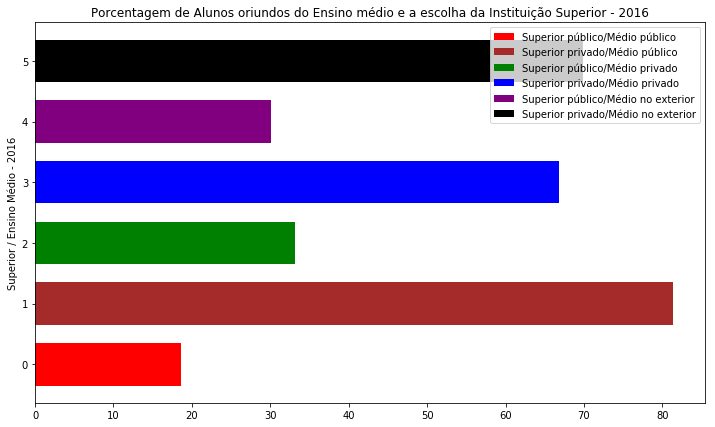

In [179]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[1], total_p_ipp[1], total_pp_ip[1], total_pp_ipp[1], total_e_ip[1], total_e_ipp[1]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2016')
plt.ylabel('Superior / Ensino Médio - 2016')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


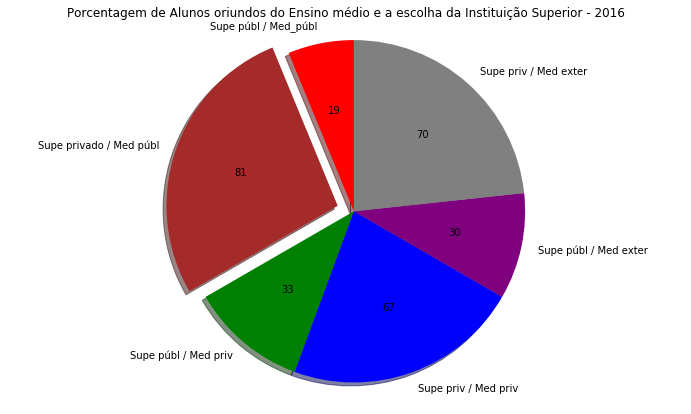

In [180]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[1], total_p_ipp[1], total_pp_ip[1], total_pp_ipp[1], total_e_ip[1], total_e_ipp[1]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2016')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

In [181]:
escola_publica15 = tabela[2][tabela[2]['QE_I17'] == 1]
escola_privada15 = tabela[2][tabela[2]['QE_I17'] == 2]
escola_exterior15 = tabela[2][tabela[2]['QE_I17'] == 3]

escola_publica.append(escola_publica15)
escola_privada.append(escola_privada15)
escola_exterior.append(escola_exterior15)

escola_publica[2].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,324852.000000,324852.000000,324852.0,324852.000000,324852.000000,324852.000000
mean,3.261784,0.884175,1.0,29.129779,0.607006,3.010186
std,0.985238,0.320016,0.0,8.058438,0.488681,1.421811
min,1.000000,0.000000,1.0,17.000000,0.000000,1.000000
25%,3.000000,1.000000,1.0,23.000000,0.000000,2.000000
50%,3.000000,1.000000,1.0,27.000000,1.000000,3.000000
75%,4.000000,1.000000,1.0,33.000000,1.000000,4.000000
max,5.000000,1.000000,1.0,88.000000,3.000000,7.000000


In [182]:
escola_privada[2].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,141801.000000,141801.000000,141801.0,141801.000000,141801.000000,141801.000000
mean,3.031213,0.805276,2.0,26.874923,0.558494,4.391979
std,0.964240,0.395989,0.0,7.518686,0.496654,1.661553
min,1.000000,0.000000,2.0,16.000000,0.000000,1.000000
25%,2.000000,1.000000,2.0,22.000000,0.000000,3.000000
50%,3.000000,1.000000,2.0,24.000000,1.000000,5.000000
75%,4.000000,1.000000,2.0,28.000000,1.000000,6.000000
max,5.000000,1.000000,2.0,86.000000,3.000000,7.000000


In [183]:
escola_exterior[2].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,2301.000000,2301.000000,2301.0,2301.000000,2301.000000,2301.000000
mean,3.237723,0.827032,3.0,25.918296,0.541504,4.974794
std,0.828557,0.378302,0.0,6.248987,0.498383,1.860170
min,1.000000,0.000000,3.0,19.000000,0.000000,1.000000
25%,3.000000,1.000000,3.0,22.000000,0.000000,4.000000
50%,3.000000,1.000000,3.0,24.000000,1.000000,6.000000
75%,4.000000,1.000000,3.0,27.000000,1.000000,6.000000
max,5.000000,1.000000,3.0,72.000000,1.000000,7.000000


In [184]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2015
p_ip15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 0)]
p_ipp15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 1)]

p_ip.append(p_ip15)
p_ipp.append(p_ipp15)

# ESCOLA PRIVADA vs CO_CATEGAD - 2015
pp_ip15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 0)]
pp_ipp15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 1)]

pp_ip.append(pp_ip15)
pp_ipp.append(pp_ipp15)

# ESCOLA EXTERIOR vs CO_CATEGAD - 2015
e_ip15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 0)]
e_ipp15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 1)]

e_ip.append(e_ip15)
e_ipp.append(e_ipp15)

In [185]:
total_p15 = escola_publica[2].shape[0]
total_pp15 = escola_privada[2].shape[0]
total_e15 = escola_exterior[2].shape[0]

total_p.append(total_p15)
total_pp.append(total_pp15)
total_e.append(total_e15)

total_p_ip15 = (p_ip[2].shape[0]/total_p[2]) * 100
total_p_ipp15 = (p_ipp[2].shape[0]/total_p[2]) * 100

total_pp_ip15 = (pp_ip[2].shape[0]/total_pp[2]) * 100
total_pp_ipp15 = (pp_ipp[2].shape[0]/total_pp[2]) * 100

total_e_ip15 = (e_ip[2].shape[0]/total_e[2]) * 100
total_e_ipp15 = (e_ipp[2].shape[0]/total_e[2]) * 100

total_p_ip.append(total_p_ip15)
total_p_ipp.append(total_p_ipp15)
total_pp_ip.append(total_pp_ip15)
total_pp_ipp.append(total_pp_ipp15)
total_e_ip.append(total_e_ip15)
total_e_ipp.append(total_e_ipp15)

print('ENADE - 2015 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[2])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[2])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[2])
print('                                                                                 Total = ', total_p_ip[2] +  total_p_ipp[2])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[2])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[2])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[2])
print('                                                                                 Total = ', total_pp_ip[2] +  total_pp_ipp[2])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[2])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[2])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[2])
print('                                                                                     Total = ', total_e_ip[2] +  total_e_ipp[2])

ENADE - 2015 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  324852
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  11.582505263935577
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  88.41749473606443
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  141801
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  19.472359151204856
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  80.52764084879514
                                                                                 Total =  100.0

..... ENSINO MÉDIO EXTERIOR .....
         

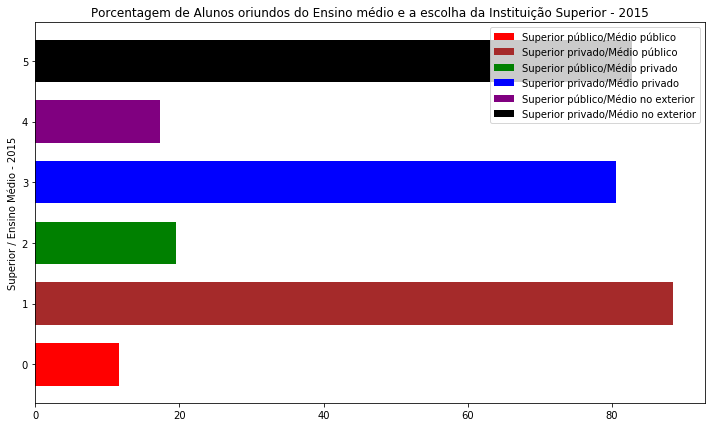

In [186]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[2], total_p_ipp[2], total_pp_ip[2], total_pp_ipp[2], total_e_ip[2], total_e_ipp[2]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2015')
plt.ylabel('Superior / Ensino Médio - 2015')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


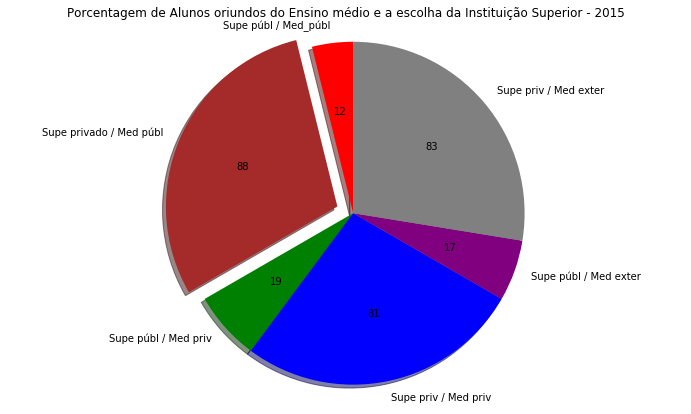

In [187]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[2], total_p_ipp[2], total_pp_ip[2], total_pp_ipp[2], total_e_ip[2], total_e_ipp[2]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2015')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

In [188]:
escola_publica14 = tabela[3][tabela[3]['QE_I17'] == 1]
escola_privada14 = tabela[3][tabela[3]['QE_I17'] == 2]
escola_exterior14 = tabela[3][tabela[3]['QE_I17'] == 3]

escola_publica.append(escola_publica14)
escola_privada.append(escola_privada14)
escola_exterior.append(escola_exterior14)

escola_publica[3].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,313337.000000,313337.000000,313337.0,313337.000000,313337.000000,313337.000000
mean,3.031640,0.637665,1.0,30.406138,0.618877,2.633331
std,1.038268,0.480676,0.0,8.532978,0.485939,1.393199
min,1.000000,0.000000,1.0,17.000000,0.000000,1.000000
25%,2.000000,0.000000,1.0,24.000000,0.000000,2.000000
50%,3.000000,1.000000,1.0,28.000000,1.000000,2.000000
75%,4.000000,1.000000,1.0,35.000000,1.000000,3.000000
max,5.000000,1.000000,1.0,78.000000,3.000000,7.000000


In [189]:
escola_privada[3].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,103453.000000,103453.000000,103453.0,103453.000000,103453.000000,103453.000000
mean,3.011715,0.539192,2.0,27.165205,0.463785,4.097987
std,0.921428,0.498464,0.0,7.412703,0.498980,1.649331
min,1.000000,0.000000,2.0,17.000000,0.000000,1.000000
25%,2.000000,0.000000,2.0,23.000000,0.000000,3.000000
50%,3.000000,1.000000,2.0,24.000000,0.000000,4.000000
75%,3.000000,1.000000,2.0,28.000000,1.000000,5.000000
max,5.000000,1.000000,2.0,82.000000,3.000000,7.000000


In [190]:
escola_exterior[3].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,QE_I08
count,1247.000000,1247.000000,1247.0,1247.000000,1247.000000,1247.000000
mean,3.207698,0.623095,3.0,27.678428,0.448276,4.479551
std,0.871893,0.484805,0.0,7.551325,0.497517,1.921248
min,1.000000,0.000000,3.0,19.000000,0.000000,1.000000
25%,3.000000,0.000000,3.0,23.000000,0.000000,3.000000
50%,3.000000,1.000000,3.0,25.000000,0.000000,5.000000
75%,4.000000,1.000000,3.0,29.000000,1.000000,6.000000
max,5.000000,1.000000,3.0,68.000000,1.000000,7.000000


In [191]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2014
p_ip14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 0)]
p_ipp14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 1)]

p_ip.append(p_ip14)
p_ipp.append(p_ipp14)

# ESCOLA PRIVADA vs CO_CATEGAD - 2014
pp_ip14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 0)]
pp_ipp14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 1)]

pp_ip.append(pp_ip14)
pp_ipp.append(pp_ipp14)

# ESCOLA EXTERIOR vs CO_CATEGAD - 2014
e_ip14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 0)]
e_ipp14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 1)]

e_ip.append(e_ip14)
e_ipp.append(e_ipp14)

In [192]:
total_p14 = escola_publica[3].shape[0]
total_pp14 = escola_privada[3].shape[0]
total_e14 = escola_exterior[3].shape[0]

total_p.append(total_p14)
total_pp.append(total_pp14)
total_e.append(total_e14)

total_p_ip14 = (p_ip[3].shape[0]/total_p[3]) * 100
total_p_ipp14 = (p_ipp[3].shape[0]/total_p[3]) * 100

total_pp_ip14 = (pp_ip[3].shape[0]/total_pp[3]) * 100
total_pp_ipp14 = (pp_ipp[3].shape[0]/total_pp[3]) * 100

total_e_ip14 = (e_ip[3].shape[0]/total_e[3]) * 100
total_e_ipp14 = (e_ipp[3].shape[0]/total_e[3]) * 100

total_p_ip.append(total_p_ip14)
total_p_ipp.append(total_p_ipp14)
total_pp_ip.append(total_pp_ip14)
total_pp_ipp.append(total_pp_ipp14)
total_e_ip.append(total_e_ip14)
total_e_ipp.append(total_e_ipp14)

print('ENADE - 2014 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[3])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[3])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[3])
print('                                                                                 Total = ', total_p_ip[3] +  total_p_ipp[3])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[3])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[3])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[3])
print('                                                                                 Total = ', total_pp_ip[3] +  total_pp_ipp[3])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[3])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[3])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[3])
print('                                                                                     Total = ', total_e_ip[3] +  total_e_ipp[3])

ENADE - 2014 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  313337
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  36.2335121610279
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  63.7664878389721
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  103453
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  46.080828975476784
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  53.919171024523216
                                                                                 Total =  100.0

..... ENSINO MÉDIO EXTERIOR .....
           

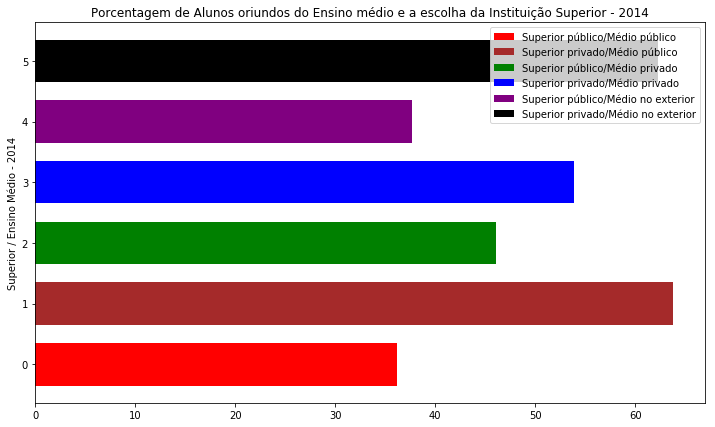

In [193]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[3], total_p_ipp[3], total_pp_ip[3], total_pp_ipp[3], total_e_ip[3], total_e_ipp[3]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2014')
plt.ylabel('Superior / Ensino Médio - 2014')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


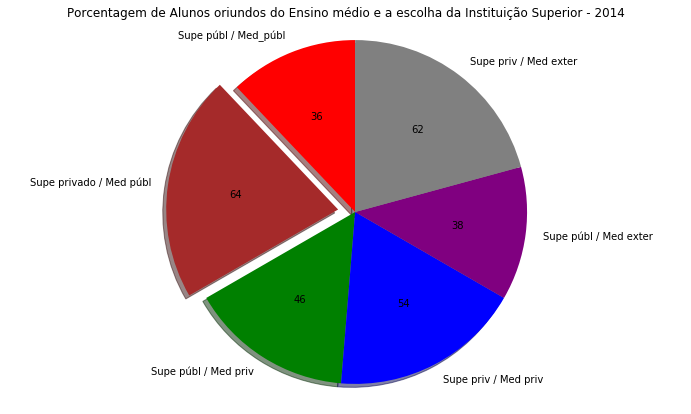

In [194]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[3], total_p_ipp[3], total_pp_ip[3], total_pp_ipp[3], total_e_ip[3], total_e_ipp[3]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2014')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

In [195]:
escola_publica13 = tabela[4][tabela[4]['QE_I16'] == 1]
escola_privada13 = tabela[4][tabela[4]['QE_I16'] == 2]

escola_publica.append(escola_publica13)
escola_privada.append(escola_privada13)

escola_publica[4].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I16,NU_IDADE,TP_SEXO,QE_I08
count,100462.000000,100462.000000,100462.0,100462.000000,100462.000000,100462.000000
mean,3.193645,0.817543,1.0,28.967112,0.727857,3.174902
std,1.073200,0.386223,0.0,7.981142,0.445199,1.394216
min,1.000000,0.000000,1.0,18.000000,0.000000,1.000000
25%,3.000000,1.000000,1.0,23.000000,0.000000,2.000000
50%,3.000000,1.000000,1.0,26.000000,1.000000,3.000000
75%,4.000000,1.000000,1.0,33.000000,1.000000,4.000000
max,5.000000,1.000000,1.0,79.000000,3.000000,6.000000


In [196]:
escola_privada[4].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I16,NU_IDADE,TP_SEXO,QE_I08
count,61450.000000,61450.000000,61450.0,61450.000000,61450.000000,61450.000000
mean,2.955167,0.664654,2.0,25.811766,0.696485,2.527844
std,0.982768,0.472115,0.0,5.994453,0.459992,0.973429
min,1.000000,0.000000,2.0,18.000000,0.000000,1.000000
25%,2.000000,0.000000,2.0,22.000000,0.000000,2.000000
50%,3.000000,1.000000,2.0,24.000000,1.000000,2.000000
75%,3.000000,1.000000,2.0,27.000000,1.000000,3.000000
max,5.000000,1.000000,2.0,75.000000,3.000000,6.000000


In [197]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2013
p_ip13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 0)]
p_ipp13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 1)]

p_ip.append(p_ip13)
p_ipp.append(p_ipp13)

# ESCOLA PRIVADA vs CO_CATEGAD - 2013
pp_ip13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 0)]
pp_ipp13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 1)]

pp_ip.append(pp_ip13)
pp_ipp.append(pp_ipp13)

In [198]:
total_p13 = escola_publica[4].shape[0]
total_pp13 = escola_privada[4].shape[0]

total_p.append(total_p13)
total_pp.append(total_pp13)

total_p_ip13 = (p_ip[4].shape[0]/total_p[4]) * 100
total_p_ipp13 = (p_ipp[4].shape[0]/total_p[4]) * 100

total_pp_ip13 = (pp_ip[4].shape[0]/total_pp[4]) * 100
total_pp_ipp13 = (pp_ipp[4].shape[0]/total_pp[4]) * 100

total_p_ip.append(total_p_ip13)
total_p_ipp.append(total_p_ipp13)
total_pp_ip.append(total_pp_ip13)
total_pp_ipp.append(total_pp_ipp13)
total_e_ip.append(0)
total_e_ipp.append(0)



print('ENADE - 2013 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[4])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[4])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[4])
print('                                                                                 Total = ', total_p_ip[4] +  total_p_ipp[4])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[4])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[4])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[4])
print('                                                                                 Total = ', total_pp_ip[4] +  total_pp_ipp[4])

ENADE - 2013 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  100462
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  18.245704843622466
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  81.75429515637754
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  61450
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  33.53458096013019
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  66.46541903986981
                                                                                 Total =  100.0


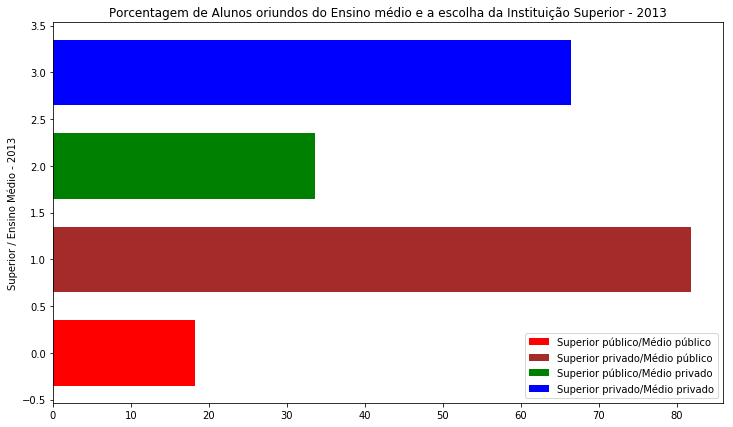

In [199]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[4], total_p_ipp[4], total_pp_ip[4], total_pp_ipp[4]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2013')
plt.ylabel('Superior / Ensino Médio - 2013')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


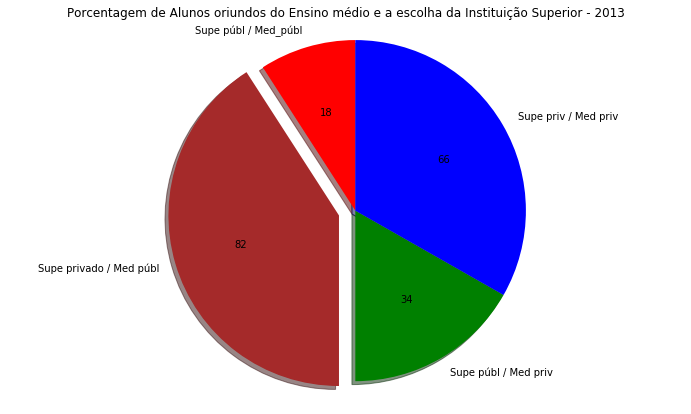

In [200]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 
                    'Supe priv / Med priv']
ensino = [total_p_ip[4], total_p_ipp[4], total_pp_ip[4], total_pp_ipp[4]]
cores = ['red', 'Brown', 'green', 'blue']
explode = (0, 0.1, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, 
        autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2013')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

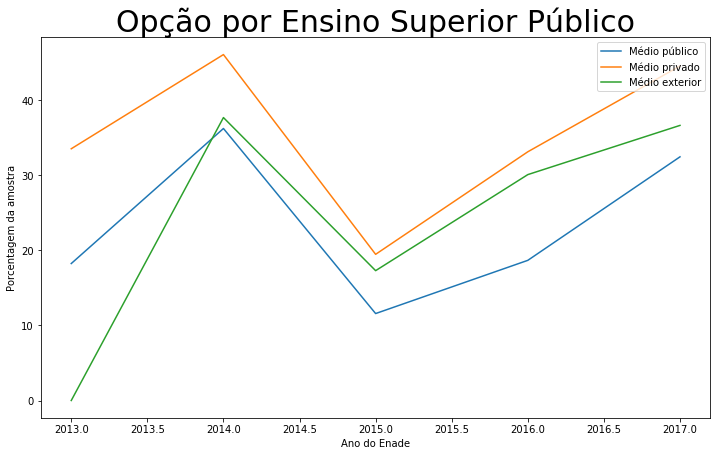

In [201]:
anos = [2017, 2016, 2015, 2014, 2013]

legenda = ["Pública", "Privada", "Exterior"]

# Plotar 3 series de dados 
plt.plot(anos, total_p_ip)
plt.plot(anos, total_pp_ip)
plt.plot(anos, total_e_ip)
# Definir label, titulo e quadro com legenda
plt.ylabel("Porcentagem da amostra")
plt.xlabel("Ano do Enade")
plt.title("Opção por Ensino Superior Público", fontsize=30)
plt.legend(('Médio público', 'Médio privado', 'Médio exterior'),
           loc='upper right')
plt.show()

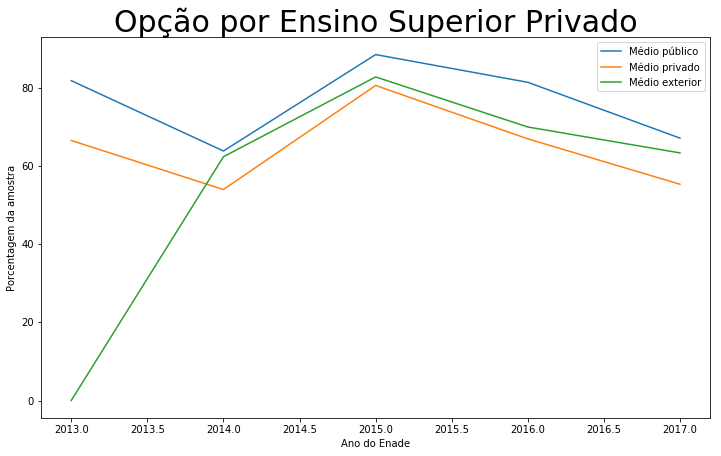

In [202]:
# Plotar 3 series de dados 
plt.plot(anos, total_p_ipp)
plt.plot(anos, total_pp_ipp)
plt.plot(anos, total_e_ipp)
# Definir label, titulo e quadro com legenda
plt.ylabel("Porcentagem da amostra")
plt.xlabel("Ano do Enade")
plt.title("Opção por Ensino Superior Privado", fontsize=30)
plt.legend(('Médio público', 'Médio privado', 'Médio exterior'),
           loc='upper right')
plt.show()

In [203]:
total_p

[340621, 138209, 324852, 313337, 100462]

In [204]:
total_pp

[125586, 63846, 141801, 103453, 61450]

In [205]:
total_e

[1449, 545, 2301, 1247]